# Assignment - Introduction to Keras and TensorFlow

Using the datasets you used in the second project, the regression project and the third project, the classification project, build regression and classification models with Keras.

After creating each of the above models, let's consider how we can develop the models you have created. Let's discuss what you can do (or change what you do) to improve your model. Then, let's apply the proposed methods in the Keras library.

## 1. Regression Model With Keras

In [1]:
import pandas as pd
import numpy as np

house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

houseprices_df = house_prices_df.interpolate(method ='linear', limit_direction ='forward')

df_prices = houseprices_df.filter(['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','YearBuilt','SalePrice'], axis=1)

# Y is the target variable
y1 = df_prices['SalePrice']
# X is the feature set
X1 = df_prices[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

In [3]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   TotalBsmtSF  1460 non-null   int64
 2   1stFlrSF     1460 non-null   int64
 3   GrLivArea    1460 non-null   int64
 4   GarageCars   1460 non-null   int64
 5   GarageArea   1460 non-null   int64
 6   YearBuilt    1460 non-null   int64
 7   SalePrice    1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


## 1.1. Specify Architecture

In [4]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=111)

In [5]:
print("Shape of train set (X) :", X1_train.shape)
print("Shape of train set (y) :", y1_train.shape)
print("Shape of test set  (X) :", X1_test.shape)
print("Shape of test set  (y) :", y1_test.shape)

Shape of train set (X) : (1168, 4)
Shape of train set (y) : (1168,)
Shape of test set  (X) : (292, 4)
Shape of test set  (y) : (292,)


In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
input_number = X1_train.shape[1] 

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))

model.add(Dense(50, activation='relu', name = "Hidden_Layer_2"))

model.add(Dense(1, name = "Output"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 100)               500       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


## 1.2. Compile

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## 1.3. Fit

In [8]:
model.fit(X1_train, y1_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s 876us/step - loss: 38228897792.0000 - mae: 179450.7812
Epoch 2/20
37/37 [==============================] - 0s 809us/step - loss: 36864831488.0000 - mae: 175948.3438
Epoch 3/20
37/37 [==============================] - 0s 860us/step - loss: 33120602112.0000 - mae: 166075.0625
Epoch 4/20
37/37 [==============================] - 0s 904us/step - loss: 25062107136.0000 - mae: 142554.3906
Epoch 5/20
37/37 [==============================] - 0s 902us/step - loss: 13935802368.0000 - mae: 101092.6406
Epoch 6/20
37/37 [==============================] - 0s 1ms/step - loss: 5463232000.0000 - mae: 54404.0039
Epoch 7/20
37/37 [==============================] - 0s 1ms/step - loss: 2769501184.0000 - mae: 34190.3633
Epoch 8/20
37/37 [==============================] - 0s 1ms/step - loss: 2539465472.0000 - mae: 32297.3691
Epoch 9/20
37/37 [==============================] - 0s 930us/step - loss: 2547000576.0000 - mae: 32255.1309
Epoch 10/20
37/37 [=====

## 1.4. Predict

In [9]:
mae_train = model.evaluate(X1_train, y1_train, verbose = 0)[1]
mae_test = model.evaluate(X1_test, y1_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 32216.855
MAE for test set    : 31595.100


In [10]:
pred_test1 = model.predict(X1_test)
pred_train1 = model.predict(X1_train)

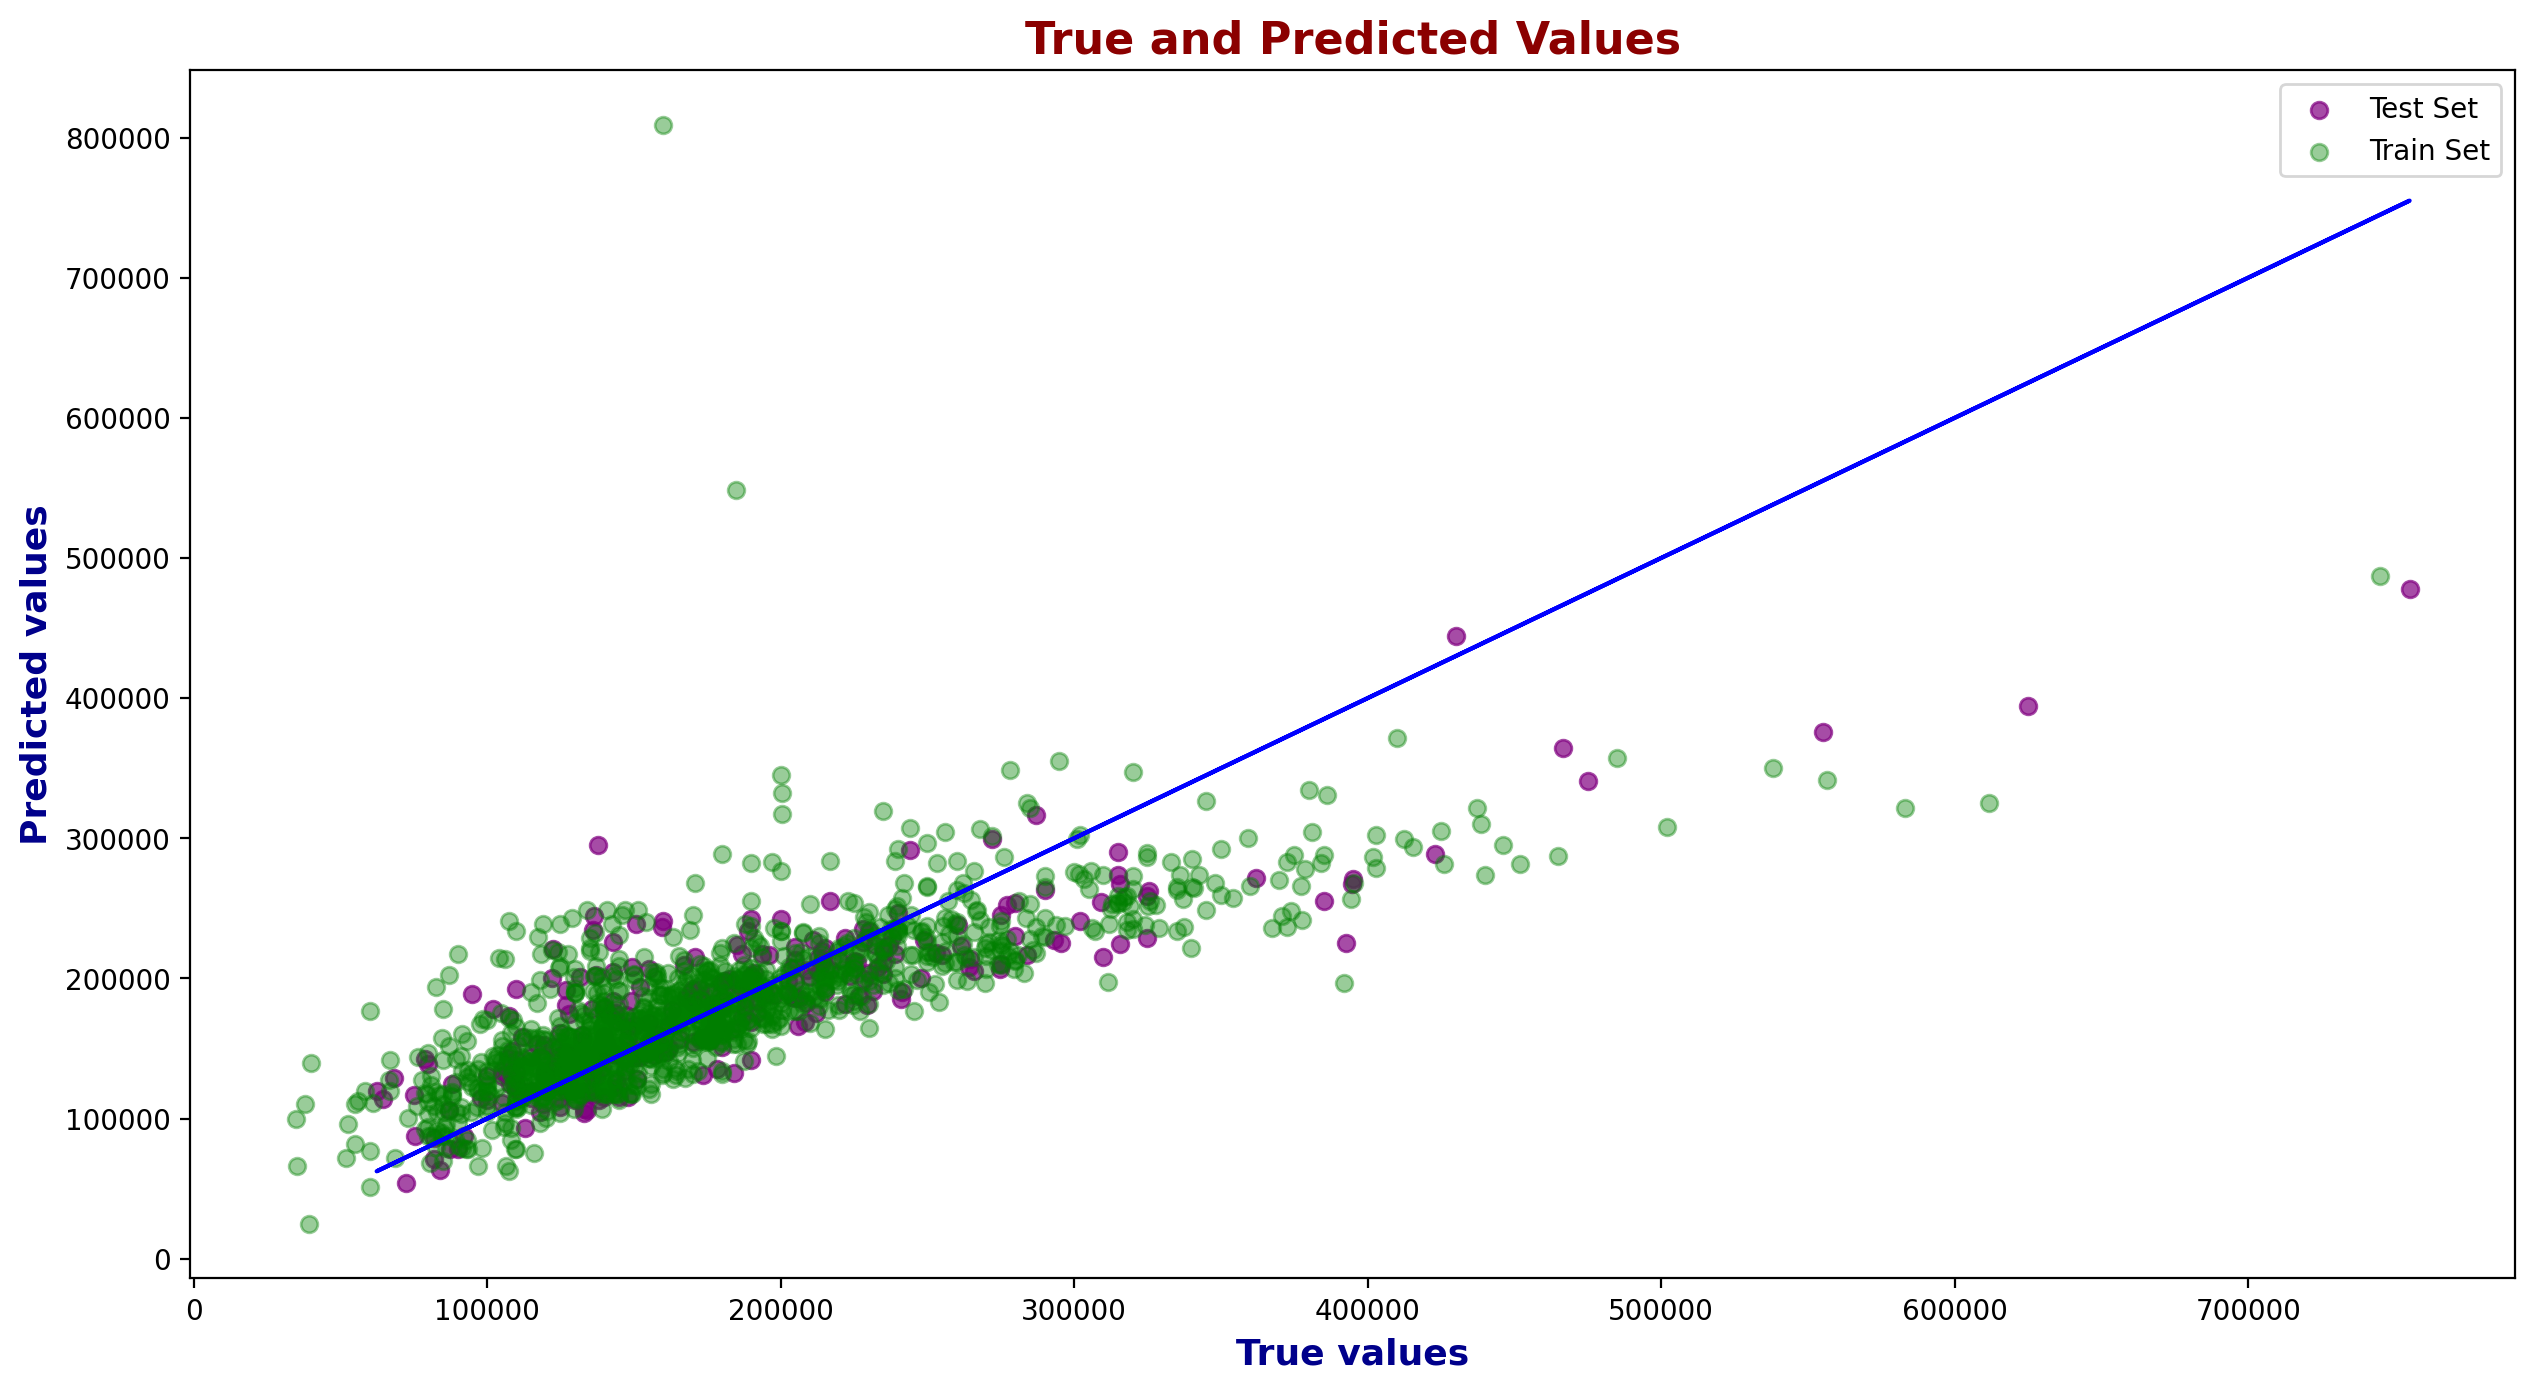

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y1_test,pred_test1,alpha=0.7,color="purple", )
ax2 = plt.scatter(y1_train,pred_train1,alpha=0.4,color="green")
ax3 = plt.plot(y1_test,y1_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

## 2.Classification Model With Keras

In [12]:
train_data = pd.read_csv('titanic_train.csv')

In [13]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)  

# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

train_data.dropna(subset=['Age'], how='all', inplace=True)

In [14]:
df = train_data[['Pclass','is_male','Age','Fare','Embarked','Survived']]

X = df[['Pclass','is_male','Age','Fare','Embarked']]
y = df['Survived']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   is_male   714 non-null    uint8  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
 4   Embarked  714 non-null    float64
 5   Survived  714 non-null    int64  
dtypes: float64(3), int64(2), uint8(1)
memory usage: 34.2 KB


## 2.1. Specify Architecture

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

print("Eğitim kümesi boyutu (X) :", X_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (571, 5)
Eğitim kümesi boyutu (y) : (571,)
Test kümesi boyutu (X)   : (143, 5)
Test kümesi boyutu (y)   : (143,)


In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [18]:
input_number = X_train.shape[1]
print(input_number)

5


In [19]:
classification_model = Sequential()
classification_model.add(Dense(16, activation='relu', input_shape = (input_number,), name = "Hidden_Layer_1"))

classification_model.add(Dense(4, activation='relu', name = "Hidden_Layer_2"))
#We will use sigmoid as the activation function for this layer to return a value between 0 and 1.
classification_model.add(Dense(1, activation='sigmoid', name = "Output"))

classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 16)                96        
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 4)                 68        
_________________________________________________________________
Output (Dense)               (None, 1)                 5         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


## 2.2. Compile

In [20]:
classification_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

## 2.3. Fit

In [21]:
classification_model.fit(X_train, y_train, epochs=100, verbose=0)

In [22]:
accuracy_train = classification_model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = classification_model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.751
Accuracy for test set  : 0.727


## 2.4. Predict

In [23]:
y_pred=classification_model.predict(X_test)
y_pred =(y_pred>0.5)

In [24]:
from sklearn.metrics import confusion_matrix
hm = confusion_matrix(y_test, y_pred)
print(hm)

[[72 16]
 [23 32]]


Confusion Matrix (Karmaşıklık Matrisi) toplam 4 ihtimal vardır:
1. True Positive(TP), Modelimizin doğru tahmin ettiği ihtimallerden biridir: 67
2. True Negative(TN), Modelimizin doğru tahmin ettiği ihtimallerden biridir: 42
3. False Positive(FP), Modelimizin yanlış tahmin ettiği ihtimallerden biridir: 21
4. False Negative(FN), Modelimizin yanlış tahmin ettiği ihtimallerden biridir: 13

In [25]:
TP = 67
TN = 42
FP = 21
FN = 13

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.7622377622377622

In [26]:
Precision = TP /(TP+FP)
Precision

0.7613636363636364